In [92]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [63]:
train = pd.read_csv(r"C:\Users\user\Desktop\kaggle data\train.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [64]:
test =pd.read_csv(r"C:\Users\user\Desktop\kaggle data\test.csv")
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [65]:
sample_sub = pd.read_csv(r"C:\Users\user\Desktop\kaggle data\sample_submission.csv")
sample_sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [66]:
train.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [68]:
train.shape

(7613, 5)

In [70]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [71]:
train.fillna("",inplace=True)
test.fillna("",inplace=True)

In [72]:
train.head(2)

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1


In [73]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

C:\Users\user\anaconda3\anac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


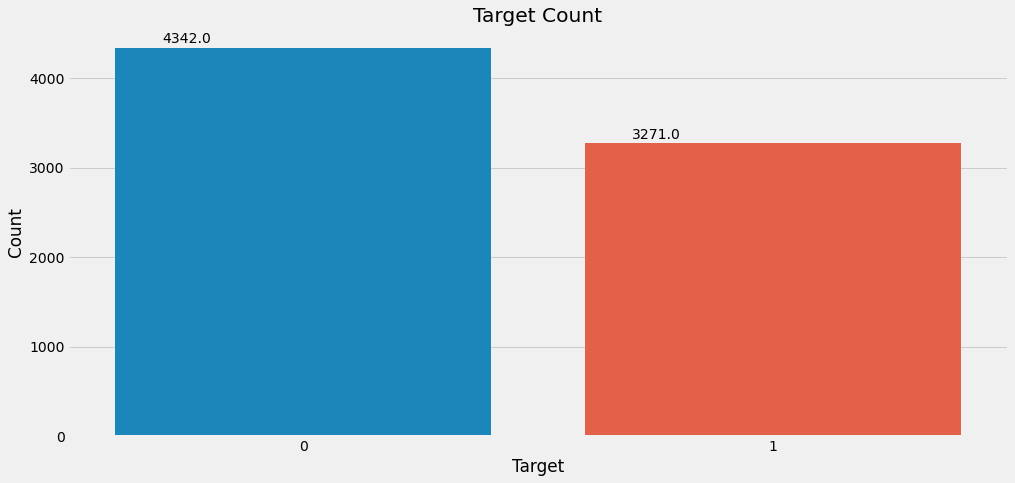

In [74]:
plt.figure(figsize=(15,7))
x = sns.countplot(train['target'])
plt.title('Target Count')
plt.xlabel('Target')
plt.ylabel('Count')
for p in x.patches:
    x.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

In [75]:
train['location'].value_counts().head(40)

                     2533
USA                   104
New York               71
United States          50
London                 45
Canada                 29
Nigeria                28
UK                     27
Los Angeles, CA        26
India                  24
Mumbai                 22
Washington, DC         21
Kenya                  20
Worldwide              19
Australia              18
Chicago, IL            18
California             17
New York, NY           15
California, USA        15
Everywhere             15
Florida                14
United Kingdom         14
San Francisco          14
Washington, D.C.       13
Los Angeles            13
Indonesia              13
NYC                    12
Ireland                12
Toronto                12
San Francisco, CA      11
Earth                  11
Chicago                11
Seattle                11
Texas                  10
New York City          10
ss                     10
London, England        10
Atlanta, GA            10
London, UK  

In [78]:
train['keyword'].value_counts().head(30)

               61
fatalities     45
armageddon     42
deluge         42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
fear           40
twister        40
windstorm      40
siren          40
collided       40
evacuate       40
wreckage       39
famine         39
whirlwind      39
sinkhole       39
earthquake     39
wrecked        39
hellfire       39
weapons        39
sunk           39
explosion      39
weapon         39
derailment     39
flames         39
collision      39
ambulance      38
Name: keyword, dtype: int64

# NLP Processing and data Cleaning

In [81]:
dataset = pd.DataFrame()
test_dataset_cleaned = pd.DataFrame()
dataset['all_combined'] = train['keyword'] + " " + train['location'] + " " + train['text']
test_dataset_cleaned['all_combined'] = test['keyword'] + " " + test['location'] + " " + test['text']

print(dataset.shape)
test_dataset_cleaned.shape
#dataset.tail(100)

(7613, 1)


(3263, 1)

In [82]:
dataset.head()

,all_combined
0,Our Deeds are the Reason of this #earthquake...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' ar...
3,"13,000 people receive #wildfires evacuation ..."
4,Just got sent this photo from Ruby #Alaska a...


In [83]:
test_dataset_cleaned.head()

,all_combined
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities,..."
2,"there is a forest fire at spot pond, geese a..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [84]:
def clean(data):
    data = data.lower()
    data = re.sub('https?://\S+|www\.\S+', ' ', data)
    data = re.sub('\\W', ' ', data)
    data = re.sub('\n', ' ', data)
    data = re.sub(' +', ' ', data)
    data = re.sub('^ ', ' ', data)
    data = re.sub(' $', ' ', data)
    data = re.sub('#', ' ', data)
    data = re.sub('@', ' ', data)
    data = re.sub('[^a-zA-Z]',' ', data)
    return data

In [85]:
dataset['all_cleaned'] = dataset['all_combined'].astype(str).apply(clean)
test_dataset_cleaned['all_cleaned'] = test_dataset_cleaned['all_combined'].astype(str).apply(clean)

In [87]:
dataset['target'] = train['target']

In [88]:
dataset.head(100)

,all_combined,all_cleaned,target
0,Our Deeds are the Reason of this #earthquake...,our deeds are the reason of this earthquake m...,1
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,1
2,All residents asked to 'shelter in place' ar...,all residents asked to shelter in place are b...,1
3,"13,000 people receive #wildfires evacuation ...",people receive wildfires evacuation or...,1
4,Just got sent this photo from Ruby #Alaska a...,just got sent this photo from ruby alaska as ...,1
...,...,...,...
95,accident Charlotte 9 Mile backup on I-77 South...,accident charlotte mile backup on i south...,1
96,"accident Baton Rouge, LA Has an accident chang...",accident baton rouge la has an accident change...,0
97,"accident Hagerstown, MD #BREAKING: there was a...",accident hagerstown md breaking there was a de...,1
98,"accident Gloucestershire , UK @flowri were you...",accident gloucestershire uk flowri were you ma...,0


In [89]:
test_dataset_cleaned.tail(100)

,all_combined,all_cleaned
3163,wildfire About to get it with the babes of #w...,wildfire about to get it with the babes of wil...
3164,"wildfire Tucson, Arizona Here's a quick timela...",wildfire tucson arizona here s a quick timelap...
3165,"wildfire Seattle, WA #WAwildfire in #chelan? W...",wildfire seattle wa wawildfire in chelan wolve...
3166,wildfire West Virginia can't eat a wildfire c...,wildfire west virginia can t eat a wildfire ch...
3167,wildfire Cherokee Road and Road 22 (Three Sis...,wildfire cherokee road and road three siste...
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FAS...,earthquake safety los angeles safety faste...
3259,Storm in RI worse than last hurricane. My ci...,storm in ri worse than last hurricane my city...
3260,Green Line derailment in Chicago http://t.co...,green line derailment in chicago
3261,MEG issues Hazardous Weather Outlook (HWO) h...,meg issues hazardous weather outlook hwo


In [93]:
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [94]:
stop = set(stopwords.words('english'))
def remove_stopwords(data):
    words = [word for word in data if word not in stop]
    #print(words)
    words= "".join(words).split()
    #print(words)
    words= [words.lower() for words in data.split()]
    #print(words)
    return words

In [95]:
dataset['all_cleaned'].apply(remove_stopwords)
test_dataset_cleaned['all_cleaned'].apply(remove_stopwords)

0               [just, happened, a, terrible, car, crash]
1       [heard, about, earthquake, is, different, citi...
2       [there, is, a, forest, fire, at, spot, pond, g...
3              [apocalypse, lighting, spokane, wildfires]
4       [typhoon, soudelor, kills, in, china, and, tai...
                              ...                        
3258    [earthquake, safety, los, angeles, safety, fas...
3259    [storm, in, ri, worse, than, last, hurricane, ...
3260               [green, line, derailment, in, chicago]
3261      [meg, issues, hazardous, weather, outlook, hwo]
3262    [cityofcalgary, has, activated, its, municipal...
Name: all_cleaned, Length: 3263, dtype: object

In [96]:
dataset.head(520)

,all_combined,all_cleaned,target
0,Our Deeds are the Reason of this #earthquake...,our deeds are the reason of this earthquake m...,1
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,1
2,All residents asked to 'shelter in place' ar...,all residents asked to shelter in place are b...,1
3,"13,000 people receive #wildfires evacuation ...",people receive wildfires evacuation or...,1
4,Just got sent this photo from Ruby #Alaska a...,just got sent this photo from ruby alaska as ...,1
...,...,...,...
515,attacked in Dimitri's arms @MageAvexis &lt; th...,attacked in dimitri s arms mageavexis lt thing...,0
516,"attacked Oslo, Norway Christian Attacked by Mu...",attacked oslo norway christian attacked by mus...,1
517,avalanche Los Angeles #WeLoveLA #NHLDucks Aval...,avalanche los angeles welovela nhlducks avalan...,0
518,"avalanche Loughton, Essex, UK I liked a @YouTu...",avalanche loughton essex uk i liked a youtube ...,0


In [97]:
test_dataset_cleaned.head(520)

,all_combined,all_cleaned
0,Just happened a terrible car crash,just happened a terrible car crash
1,"Heard about #earthquake is different cities,...",heard about earthquake is different cities st...
2,"there is a forest fire at spot pond, geese a...",there is a forest fire at spot pond geese are...
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan
...,...,...
515,bridge%20collapse New York City & Mpls/St. Pau...,bridge collapse new york city mpls st paul t...
516,bridge%20collapse India Ashes 2015: Australia...,bridge collapse india ashes australia ...
517,bridge%20collapse Two giant cranes holding a ...,bridge collapse two giant cranes holding a b...
518,bridge%20collapse Minneapolis St. Paul Minneso...,bridge collapse minneapolis st paul minnesot...


In [98]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [99]:
def lemmatization(data):
    lemmas = []
    for word in data.split():
        lemmas.append(lemmatizer.lemmatize(word))
    return " ".join(lemmas)

dataset['all_cleaned'].apply(lemmatization)
test_dataset_cleaned['all_cleaned'].apply(lemmatization)

0                      just happened a terrible car crash
1       heard about earthquake is different city stay ...
2       there is a forest fire at spot pond goose are ...
3                    apocalypse lighting spokane wildfire
4               typhoon soudelor kill in china and taiwan
                              ...                        
3258    earthquake safety los angeles safety fastener ...
3259    storm in ri worse than last hurricane my city ...
3260                     green line derailment in chicago
3261              meg issue hazardous weather outlook hwo
3262    cityofcalgary ha activated it municipal emerge...
Name: all_cleaned, Length: 3263, dtype: object

In [100]:
dataset.head(520)

,all_combined,all_cleaned,target
0,Our Deeds are the Reason of this #earthquake...,our deeds are the reason of this earthquake m...,1
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,1
2,All residents asked to 'shelter in place' ar...,all residents asked to shelter in place are b...,1
3,"13,000 people receive #wildfires evacuation ...",people receive wildfires evacuation or...,1
4,Just got sent this photo from Ruby #Alaska a...,just got sent this photo from ruby alaska as ...,1
...,...,...,...
515,attacked in Dimitri's arms @MageAvexis &lt; th...,attacked in dimitri s arms mageavexis lt thing...,0
516,"attacked Oslo, Norway Christian Attacked by Mu...",attacked oslo norway christian attacked by mus...,1
517,avalanche Los Angeles #WeLoveLA #NHLDucks Aval...,avalanche los angeles welovela nhlducks avalan...,0
518,"avalanche Loughton, Essex, UK I liked a @YouTu...",avalanche loughton essex uk i liked a youtube ...,0


In [101]:
def tokenize(string):
    tokens = string.split()
    return tokens
dataset['all_cleaned']= dataset['all_cleaned'].apply(lambda x: tokenize(x))
test_dataset_cleaned['all_cleaned']= test_dataset_cleaned['all_cleaned'].apply(lambda x: tokenize(x))

In [102]:
dataset.head(520)

,all_combined,all_cleaned,target
0,Our Deeds are the Reason of this #earthquake...,"[our, deeds, are, the, reason, of, this, earth...",1
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, ronge, sask, canada]",1
2,All residents asked to 'shelter in place' ar...,"[all, residents, asked, to, shelter, in, place...",1
3,"13,000 people receive #wildfires evacuation ...","[people, receive, wildfires, evacuation, order...",1
4,Just got sent this photo from Ruby #Alaska a...,"[just, got, sent, this, photo, from, ruby, ala...",1
...,...,...,...
515,attacked in Dimitri's arms @MageAvexis &lt; th...,"[attacked, in, dimitri, s, arms, mageavexis, l...",0
516,"attacked Oslo, Norway Christian Attacked by Mu...","[attacked, oslo, norway, christian, attacked, ...",1
517,avalanche Los Angeles #WeLoveLA #NHLDucks Aval...,"[avalanche, los, angeles, welovela, nhlducks, ...",0
518,"avalanche Loughton, Essex, UK I liked a @YouTu...","[avalanche, loughton, essex, uk, i, liked, a, ...",0


In [103]:
dataset['all_cleaned']= dataset['all_cleaned'].apply(lambda x: ' '.join([str(elem) for elem in x]))
test_dataset_cleaned['all_cleaned']= test_dataset_cleaned['all_cleaned'].apply(lambda x: ' '.join([str(elem) for elem in x]))

In [104]:
dataset.head(520)

,all_combined,all_cleaned,target
0,Our Deeds are the Reason of this #earthquake...,our deeds are the reason of this earthquake ma...,1
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,1
2,All residents asked to 'shelter in place' ar...,all residents asked to shelter in place are be...,1
3,"13,000 people receive #wildfires evacuation ...",people receive wildfires evacuation orders in ...,1
4,Just got sent this photo from Ruby #Alaska a...,just got sent this photo from ruby alaska as s...,1
...,...,...,...
515,attacked in Dimitri's arms @MageAvexis &lt; th...,attacked in dimitri s arms mageavexis lt thing...,0
516,"attacked Oslo, Norway Christian Attacked by Mu...",attacked oslo norway christian attacked by mus...,1
517,avalanche Los Angeles #WeLoveLA #NHLDucks Aval...,avalanche los angeles welovela nhlducks avalan...,0
518,"avalanche Loughton, Essex, UK I liked a @YouTu...",avalanche loughton essex uk i liked a youtube ...,0


In [105]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['all_cleaned'])
X = X.toarray()
print(X.shape)

preparing_test_df = vectorizer.transform(test_dataset_cleaned['all_cleaned'])
preparing_test_df = preparing_test_df.toarray()
print(preparing_test_df.shape)

(7613, 17833)
(3263, 17833)


In [106]:
from sklearn.linear_model import LogisticRegression

X_train = np.array(X)
print(X_train.shape)
y_train = dataset['target']
print(y_train.shape)
X_test = np.array(preparing_test_df)
print(X_test.shape)

clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

(7613, 17833)
(7613,)
(3263, 17833)


LogisticRegression(solver='liblinear')

In [107]:
prediction = clf.predict(X_test)

In [108]:
prediction

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [110]:
submission = pd.DataFrame({"id":test["id"],"target":prediction})

In [111]:
submission.head()

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,1


In [112]:
submission.to_csv('./disaster_tweet_prediction_submission.csv', index = False)